## 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn import linear_model, metrics
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# hide warnings
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [2]:
# reading the dataset
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

#### As observed, there are 1460 rows in the dataset and 81 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Understanding the data

In [5]:
#For Exploratory Data analysis
numericalCols = ['LotArea', 'OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'BedroomAbvGr']
categoricalCols = ['MSZoning', 'LotShape', 'Neighborhood', 'CentralAir', 'MoSold', 'YrSold']

#### Continous variables

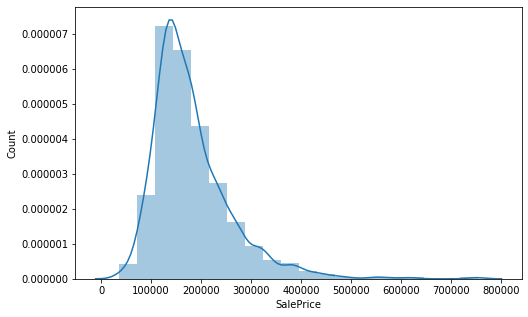

In [6]:
#SalePrice
#The final price of the house, also our target variable
plt.figure(figsize=[8, 5])
plt.xlabel('Sale Price')
plt.ylabel('Count')
sns.distplot(df['SalePrice'], norm_hist=False, bins=20)
plt.show()

#### As observed from the plot, very few houses are priced below 100,000, most of the houses sold between 100,000 and 200,000, and very few houses sold for above 400,000

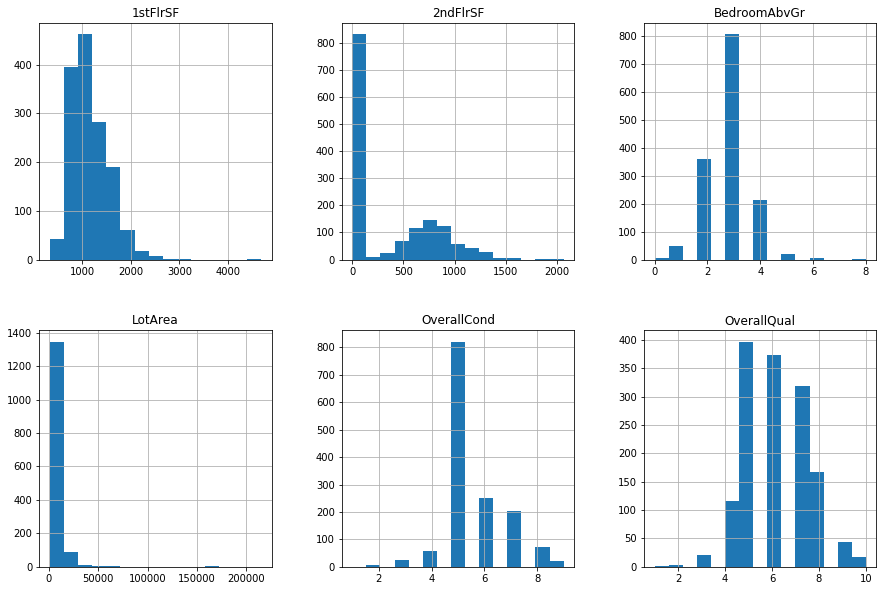

In [7]:
#Analysing other numerical variables
df[numericalCols].hist(bins=15, figsize=(15, 10), layout=(2, 3));

### 1stFlrSF: First Floor square feet
As observed from the plot, 1stFlrSF is heavily skewed right with values mostly ranging between 500 to 2000 sq. ft

### 2ndFlrSF: Second floor square feet
As observed, most of the houses do not have a second floor since the area is 0 for the most of them

### BedroomAbvGr: Bedroom above ground
As observed, Most of the houses have 3 bedrooms above ground, i.e., on 1st floor. Many also have 2 and 4 bedrooms.

### LotArea: Lot size in square feet
As observed, Since the LotArea graph has range from 0 to 200000 but the plot stays between 0 to 25000, there seem to be some outliers in this column

### OverallCond: Rates the overall condition of the house
As observed, Most of the houses available are at overall condition of 5 and many are above 5 also, i.e., average and above.

### OverallQual: Rates the overall material and finish of the house
As observed, Most of the houses available are at overall quality of 5 to 8. Very few houses are at overall quality of 9 and 10

----------------------------------------------------------------------------------------------------------------------

#### Categorical variables

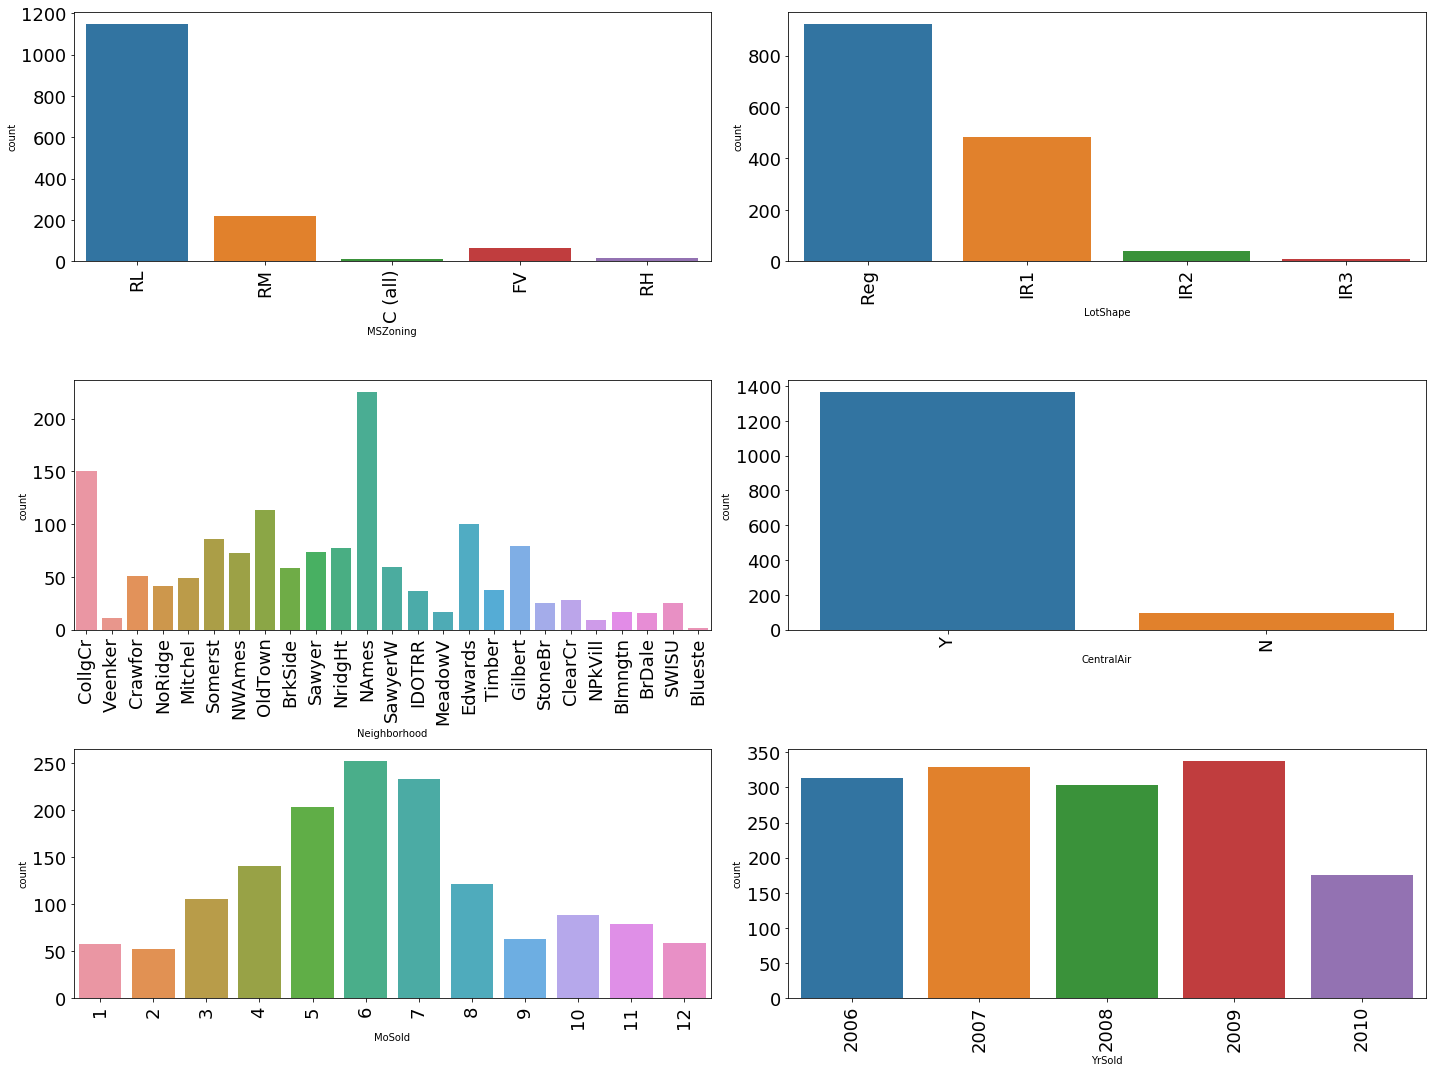

In [8]:
#Analysing categorical variables
fig, ax = plt.subplots(3, 2, figsize=(20, 15))
for var, subplot in zip(categoricalCols, ax.flatten()):
    sns.countplot(df[var], ax = subplot)
    for label in subplot.get_xticklabels():
        label.set_fontsize(18)
        label.set_rotation(90)
    for label in subplot.get_yticklabels():
        label.set_fontsize(18)
    
fig.tight_layout()

### MSZoning: Identifies the general zoning classification of the sale.
As observed, most houses have RL (Residential Low Density) zoning classification. Some have RM (Residential Medium Density) and a few of them have FV (Floating Village Residential) classification

### LotShape: General shape of property
As observed, most houses have Regular Lot shape but a significant number of houses also have Slightly irregular shape

### Neighborhood: Physical locations within Ames city limits
As observed, most houses were sold in the NAmes neighbourhood, but there a lot of houses are also sold in CollgCr neighbourhood. Somerst and Edwards also have few houses sold

### CentralAir: Central air conditioning
Approx, 92% of houses sold were centrally air conditioned. This seems to be a highly skewed column

### MoSold: Month Sold (MM)
As observed, most of the houses are sold during May-June-July month, during the summer season

### YrSold: Year Sold (YYYY)
As observed, the maximum sales was observed during the year 2009. There was a dip in sales during 2010

In [9]:
#### Investigating year 2010
df[df['YrSold'] == 2010].groupby('MoSold')['YrSold'].count()

MoSold
1    10
2    15
3    21
4    39
5    48
6    36
7     6
Name: YrSold, dtype: int64

As we can see, for the year 2010, we only have data till the month of July. This explains the dip in sales for 2010

## Bi-variate analysis

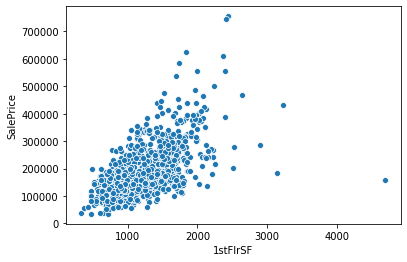

In [10]:
#Numerical vs numerical
#1stFlrSF vs SalePrice
sns.scatterplot(x=df['1stFlrSF'], y=df['SalePrice']);

#### As observed from the plot, there exists a 
positive relationship between the 1stFlrSF of the house and the SalePrice of the house. In other words, the larger the first floor of a house, the higher the likely sale price.

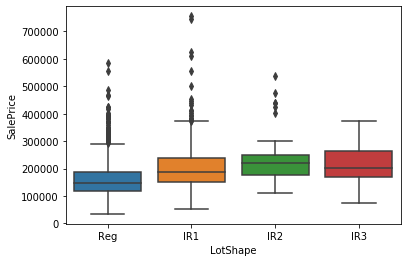

In [11]:
#Numerical-categorical
#LotShape vs SalePrice
sns.boxplot(x='LotShape', y='SalePrice', data=df)

#### As observed, though there was maximum sales from Regular and slightly irregular lot shaped houses, there is little variance in average SalePrice between houses with different LotShapes

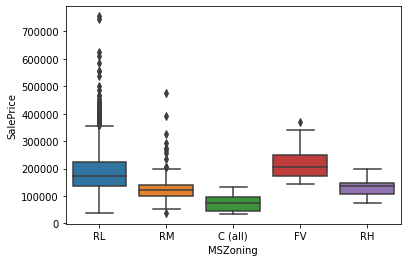

In [12]:
#Numerical-categorical
#MSZoning vs SalePrice
sns.boxplot(x='MSZoning', y='SalePrice', data=df)

#### As observed, houses with FV (Floating Village Residential) zoning classification have a higher average SalePrice than other zoning classifications

### Multivariate Analysis

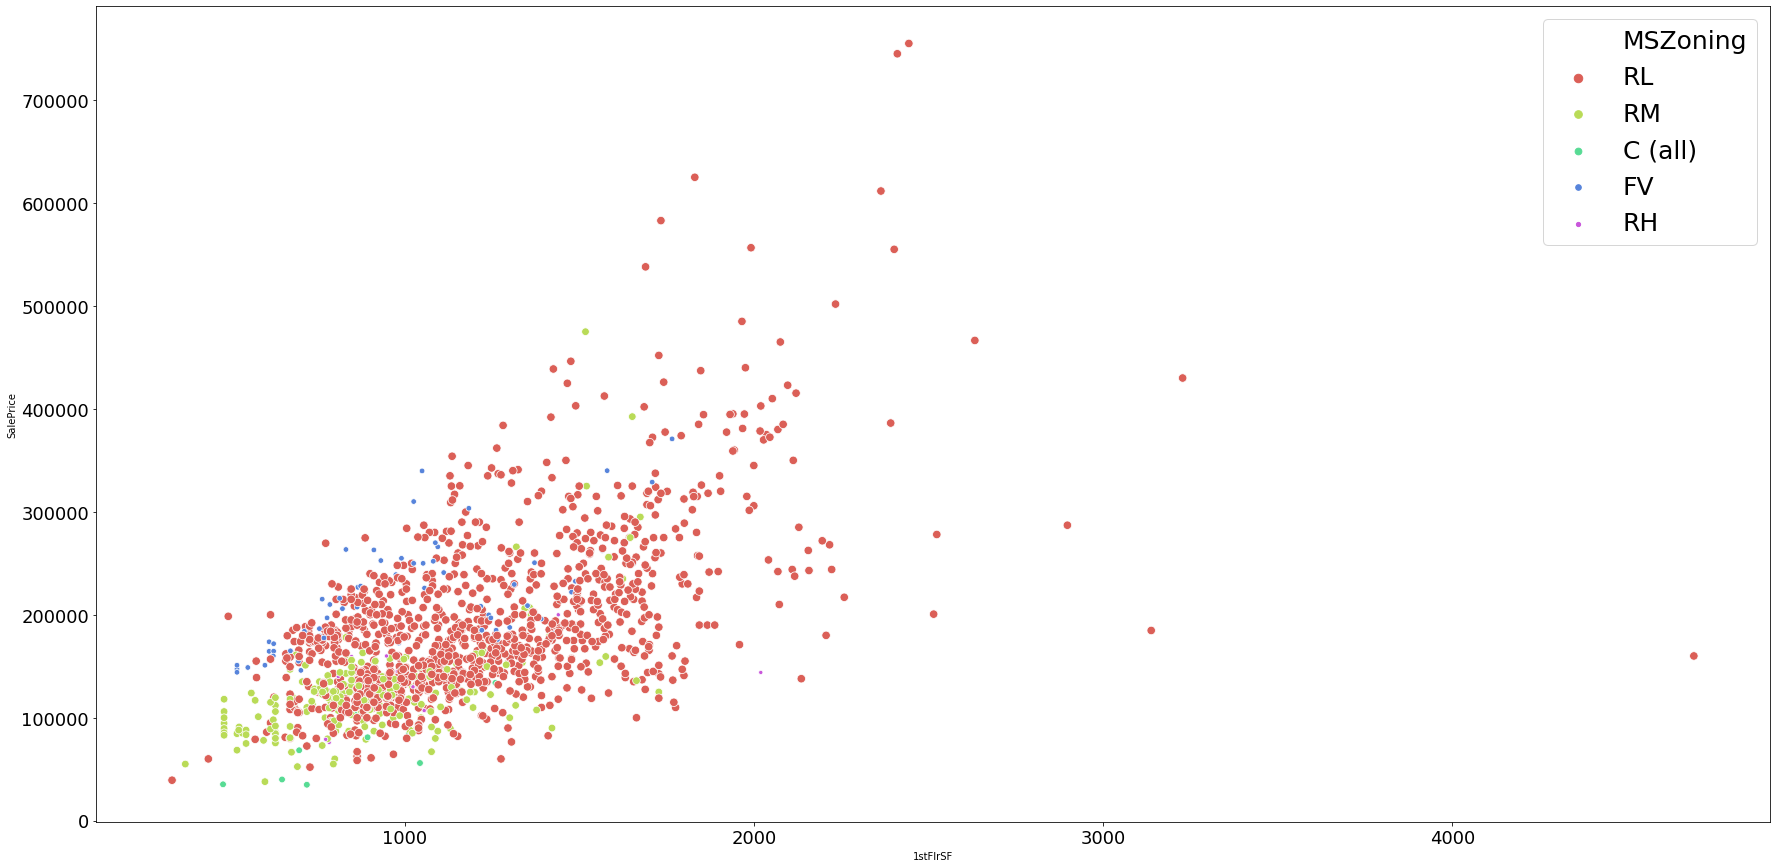

In [13]:
#1stFlrSF vs MSZoning vs SalePrice
plt.figure(figsize=[30,15])
sns.scatterplot(x = '1stFlrSF', y = 'SalePrice', hue = 'MSZoning', size = 'MSZoning', 
                palette=sns.color_palette("hls", 5), data=df)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(fontsize = 25)
plt.show()

#### As observed from the plot, RL (having most data points) houses have a wide range of selling prices, while RM and FV are low selling houses zones

## 2. Data cleaning

### Finding highly null columns

In [14]:
round(100*df.isnull().sum()/len(df.index)), 2

(Id                 0.0
 MSSubClass         0.0
 MSZoning           0.0
 LotFrontage       18.0
 LotArea            0.0
 Street             0.0
 Alley             94.0
 LotShape           0.0
 LandContour        0.0
 Utilities          0.0
 LotConfig          0.0
 LandSlope          0.0
 Neighborhood       0.0
 Condition1         0.0
 Condition2         0.0
 BldgType           0.0
 HouseStyle         0.0
 OverallQual        0.0
 OverallCond        0.0
 YearBuilt          0.0
 YearRemodAdd       0.0
 RoofStyle          0.0
 RoofMatl           0.0
 Exterior1st        0.0
 Exterior2nd        0.0
 MasVnrType         1.0
 MasVnrArea         1.0
 ExterQual          0.0
 ExterCond          0.0
 Foundation         0.0
 BsmtQual           3.0
 BsmtCond           3.0
 BsmtExposure       3.0
 BsmtFinType1       3.0
 BsmtFinSF1         0.0
 BsmtFinType2       3.0
 BsmtFinSF2         0.0
 BsmtUnfSF          0.0
 TotalBsmtSF        0.0
 Heating            0.0
 HeatingQC          0.0
 CentralAir     

Follwoing columns have high null values. Hence, dropping those:
- Alley
- PoolQC
- Fence
- MiscFeature

Also, column Id is of no use for data modelling. Hence, dropping that too

In [15]:
df=df.drop(['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)
df.shape

(1460, 76)

In [16]:
### Investigating FireplaceQu column
df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

From the data dictionary we know that, nan value in FireplaceQu means 'No_Fireplace', hence, this is a meaning full missing value. Replcaing nan with 'No_Fireplace'

In [17]:
df['FireplaceQu'] = df['FireplaceQu'].replace(np.nan, 'No_Fireplace')
df['FireplaceQu'].value_counts()

No_Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

In [19]:
# Investigating LotFrontage
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

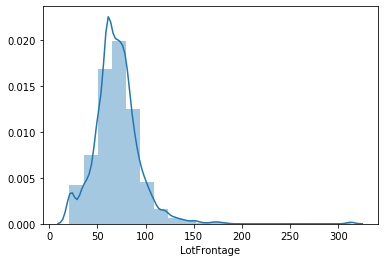

In [20]:
sns.distplot(df['LotFrontage'], norm_hist=False, bins=20)

#### Imputing missing values with mean since, median and mean are quite close

In [21]:
df['LotFrontage'] = df['LotFrontage'].replace(np.nan, df['LotFrontage'].mean())
print("Left missing values in LotFrontage columns: {0}".format(df['LotFrontage'].isnull().sum()))

Left missing values in LotFrontage columns: 0


In [22]:
### Investigating BsmtQual
df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

From the data dictionary we know that, nan value in BsmtQual means 'No_Basement', hence, this is a meaning full missing value. Replcaing nan with 'No_Basement'

In [23]:
df['BsmtQual'] = df['BsmtQual'].replace(np.nan, 'No_Basement')
df['BsmtQual'].value_counts()

TA             649
Gd             618
Ex             121
No_Basement     37
Fa              35
Name: BsmtQual, dtype: int64

In [24]:
#As for BsmtQual, similary, filling No_Basement for missing BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2
df['BsmtCond'] = df['BsmtCond'].replace(np.nan, 'No_Basement')
print('BsmtCond:')
print(df['BsmtCond'].value_counts())

df['BsmtExposure'] =df['BsmtExposure'].replace(np.nan, 'No_Basement')
print('BsmtExposure:')
print(df['BsmtExposure'].value_counts())

df['BsmtFinType1'] = df['BsmtFinType1'].replace(np.nan, 'No_Basement')
print('BsmtFinType1:')
print(df['BsmtFinType1'].value_counts())

df['BsmtFinType2'] = df['BsmtFinType2'].replace(np.nan, 'No_Basement')
print('BsmtFinType2:')
print(df['BsmtFinType2'].value_counts())

BsmtCond:
TA             1311
Gd               65
Fa               45
No_Basement      37
Po                2
Name: BsmtCond, dtype: int64
BsmtExposure:
No             953
Av             221
Gd             134
Mn             114
No_Basement     38
Name: BsmtExposure, dtype: int64
BsmtFinType1:
Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No_Basement     37
Name: BsmtFinType1, dtype: int64
BsmtFinType2:
Unf            1256
Rec              54
LwQ              46
No_Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64


In [25]:
### Investigating GarageType
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

From the data dictionary we know that, nan value in GarageType means 'No_Garage', hence, this is a meaning full missing value. Replcaing nan with 'No_Garage'

In [26]:
df['GarageType'] = df['GarageType'].replace(np.nan, 'No_Garage')
df['GarageType'].value_counts()

Attchd       870
Detchd       387
BuiltIn       88
No_Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64

In [27]:
#As for GarageType, similary, filling No_Garage for missing GarageCond, GarageFinish, GarageQual, GarageCond
df['GarageCond'] = df['GarageCond'].replace(np.nan, 'No_Garage')
print('GarageCond:')
print(df['GarageCond'].value_counts())

df['GarageFinish'] =df['GarageFinish'].replace(np.nan, 'No_Garage')
print('GarageFinish:')
print(df['GarageFinish'].value_counts())

df['GarageQual'] = df['GarageQual'].replace(np.nan, 'No_Garage')
print('GarageQual:')
print(df['GarageQual'].value_counts())

df['GarageCond'] = df['GarageCond'].replace(np.nan, 'No_Garage')
print('GarageCond:')
print(df['GarageCond'].value_counts())


GarageCond:
TA           1326
No_Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64
GarageFinish:
Unf          605
RFn          422
Fin          352
No_Garage     81
Name: GarageFinish, dtype: int64
GarageQual:
TA           1311
No_Garage      81
Fa             48
Gd             14
Ex              3
Po              3
Name: GarageQual, dtype: int64
GarageCond:
TA           1326
No_Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64


The features 'MasVnrType' and 'MasVnrArea' are inter-related. There will be no area for nan MasVnrType. Hence, imputing 0 in null 'MasVnrArea' and No_VnrType in 'MasVnrType'

In [28]:
df['MasVnrType'] = df['MasVnrType'].replace(np.nan, 'No_VnrType')
df['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', 'No_VnrType'], dtype=object)

In [29]:
df['MasVnrArea'] = df['MasVnrArea'].replace(np.nan, 0)

In [30]:
round(100*(df.isnull().sum()/len(df.index)), 2)

MSSubClass       0.00
MSZoning         0.00
LotFrontage      0.00
LotArea          0.00
Street           0.00
LotShape         0.00
LandContour      0.00
Utilities        0.00
LotConfig        0.00
LandSlope        0.00
Neighborhood     0.00
Condition1       0.00
Condition2       0.00
BldgType         0.00
HouseStyle       0.00
OverallQual      0.00
OverallCond      0.00
YearBuilt        0.00
YearRemodAdd     0.00
RoofStyle        0.00
RoofMatl         0.00
Exterior1st      0.00
Exterior2nd      0.00
MasVnrType       0.00
MasVnrArea       0.00
ExterQual        0.00
ExterCond        0.00
Foundation       0.00
BsmtQual         0.00
BsmtCond         0.00
BsmtExposure     0.00
BsmtFinType1     0.00
BsmtFinSF1       0.00
BsmtFinType2     0.00
BsmtFinSF2       0.00
BsmtUnfSF        0.00
TotalBsmtSF      0.00
Heating          0.00
HeatingQC        0.00
CentralAir       0.00
Electrical       0.07
1stFlrSF         0.00
2ndFlrSF         0.00
LowQualFinSF     0.00
GrLivArea        0.00
BsmtFullBa

The only column left with null values is GarageYrBlt, we will handle that later

### Removing highly skewed columns from the dataset and updating the feature type

In [33]:
skewnessThreshold = 80
def RemoveSkewedColumn(col, type):
    count_dict = (round(df[col].value_counts(normalize = True) * 100, 2)).to_dict()
    IsSkewed = list(map(lambda x: x >= 80, count_dict.values()))
    if IsSkewed.count(True) > 0:
        print(col, "Skewness:")
        print(count_dict)
        df.drop(col, axis = 1, inplace = True)
        print('Due to high skewness, this column was dropped')
        print()
    else:
        if type == 'category':
            #change type of column to category
            df[col] = df[col].astype('category')

In [34]:
RemoveSkewedColumn('MSZoning', 'category')

In [35]:
#Getting all the categorical columns
numerical_columns = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
                    'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt',
                    'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 
                    'PoolArea', 'SalePrice']
cat_coloumns = list(df.columns.values)
for col in numerical_columns:
    cat_coloumns.remove(col)

In [36]:
for col in cat_coloumns:
    RemoveSkewedColumn(col, 'category')

Street Skewness:
{'Pave': 99.59, 'Grvl': 0.41}
Due to high skewness, this column was dropped

LandContour Skewness:
{'Lvl': 89.79, 'Bnk': 4.32, 'HLS': 3.42, 'Low': 2.47}
Due to high skewness, this column was dropped

Utilities Skewness:
{'AllPub': 99.93, 'NoSeWa': 0.07}
Due to high skewness, this column was dropped

LandSlope Skewness:
{'Gtl': 94.66, 'Mod': 4.45, 'Sev': 0.89}
Due to high skewness, this column was dropped

Condition1 Skewness:
{'Norm': 86.3, 'Feedr': 5.55, 'Artery': 3.29, 'RRAn': 1.78, 'PosN': 1.3, 'RRAe': 0.75, 'PosA': 0.55, 'RRNn': 0.34, 'RRNe': 0.14}
Due to high skewness, this column was dropped

Condition2 Skewness:
{'Norm': 98.97, 'Feedr': 0.41, 'RRNn': 0.14, 'PosN': 0.14, 'Artery': 0.14, 'PosA': 0.07, 'RRAn': 0.07, 'RRAe': 0.07}
Due to high skewness, this column was dropped

BldgType Skewness:
{'1Fam': 83.56, 'TwnhsE': 7.81, 'Duplex': 3.56, 'Twnhs': 2.95, '2fmCon': 2.12}
Due to high skewness, this column was dropped

RoofMatl Skewness:
{'CompShg': 98.22, 'Tar&Grv'

In [37]:
# Checking the shape of dataset after removal of highly skewed columns
df.shape

(1460, 53)

In [38]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,7,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,2,1,3,Gd,8,0,No_Fireplace,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,2,2008,208500
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,6,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,2,0,3,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,5,2007,181500
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,7,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,2,1,3,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,9,2008,223500
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,7,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,1,0,3,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,2,2006,140000
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,8,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,2,1,4,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,12,2008,250000


### Outlier treatment

##### We will drop the rows which are either under or above 3 standard deviations away from their respective mean values

In [39]:
# GrLivArea
mean = df['GrLivArea'].mean()
std = df['GrLivArea'].std()
print("Upper outliers: ", df['GrLivArea'][(df['GrLivArea'] > mean + 3 * std)].count())
print("Lower outliers: ", df['GrLivArea'][(df['GrLivArea'] < mean - 3 * std)].count())

Upper outliers:  16
Lower outliers:  0


In [40]:
df = df[(df['GrLivArea'] < mean + 3 * std)]

In [41]:
# LotArea
mean = df['LotArea'].mean()
std = df['LotArea'].std()
print("Upper outliers: ", df['LotArea'][(df['LotArea'] > mean + 3 * std)].count())
print("Lower outliers: ", df['LotArea'][(df['LotArea'] < mean - 3 * std)].count())

Upper outliers:  11
Lower outliers:  0


In [42]:
df = df[(df['LotArea'] < mean + 3 * std)]

In [43]:
# LotFrontage
mean = df['LotFrontage'].mean()
std = df['LotFrontage'].std()
print("Upper outliers: ", df['LotFrontage'][(df['LotFrontage'] > mean + 3 * std)].count())
print("Lower outliers: ", df['LotFrontage'][(df['LotFrontage'] < mean - 3 * std)].count())

Upper outliers:  14
Lower outliers:  0


In [45]:
df = df[(df['LotFrontage'] < mean + 3 * std)]

In [46]:
df.shape

(1419, 53)

### Percentage of data retained

In [47]:
#We started with 1460 rows and 81 columns in the dataset
round((len(df) / 1460) * 100, 2)

97.19

We have retained 97.19% of the original data

## 3. Data preparation

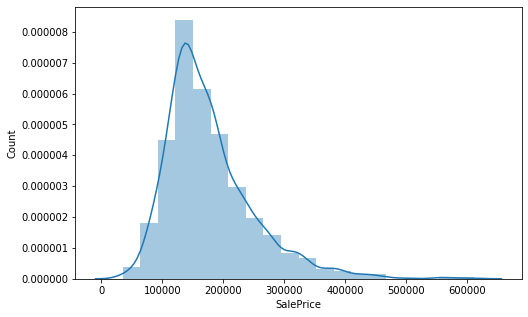

In [48]:
#SalePrice - Target variable
#The final price of the house, also our target variable
plt.figure(figsize=[8, 5])
plt.xlabel('Sale Price')
plt.ylabel('Count')
sns.distplot(df['SalePrice'], norm_hist=False, bins=20)
plt.show()

#### As observed, SalePrice has extreme high values (a long right-tail) and was not distributed normally. This suggested that the data contained a lot of outliers. But if we cap/drop the outlier we lose on important data that is required for the model to learn, otherwisw the model will be too simple and would not perform well. So, transforming the target variable

#### Transforming target variable to its natural log

In [49]:
df['SalePrice'] = np.log(df['SalePrice'])
df.shape

(1419, 53)

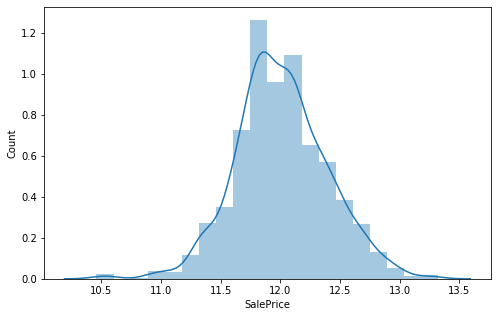

In [50]:
plt.figure(figsize=[8, 5])
plt.xlabel('Sale Price')
plt.ylabel('Count')
sns.distplot(df['SalePrice'], norm_hist=False, bins=20)
plt.show()

As we can see, now the target variable seems to be normally distributed

#### Mapping category variables

In [51]:
Qual_scale = {
    1:"Very_Poor", 
    2:"Poor", 
    3:"Fair", 
    4:"Below_Average", 
    5:"Average", 
    6:"Above_Average", 
    7:"Good", 
    8:"Very_Good", 
    9:"Excellent", 
    10:"Very_Excellent",
}

In [52]:
df[['OverallQual']] = df[['OverallQual']].apply(lambda x: x.map(Qual_scale))
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,Good,5,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,2,1,3,Gd,8,0,No_Fireplace,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,2,2008,12.247694
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,Above_Average,8,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,2,0,3,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,5,2007,12.109011
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,Good,5,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,2,1,3,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,9,2008,12.317167
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,Good,5,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,1,0,3,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,2,2006,11.849398
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,Very_Good,5,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,2,1,4,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,12,2008,12.429216


In [53]:
df[['OverallCond']] =df[['OverallCond']].apply(lambda x: x.map(Qual_scale))
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
0,60,RL,65.0,8450,Reg,Inside,CollgCr,2Story,Good,Average,2003,2003,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,1,2,1,3,Gd,8,0,No_Fireplace,Attchd,2003.0,RFn,2,548,0,61,0,0,0,0,2,2008,12.247694
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Story,Above_Average,Very_Good,1976,1976,Gable,MetalSd,MetalSd,None,0.0,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,0,2,0,3,TA,6,1,TA,Attchd,1976.0,RFn,2,460,298,0,0,0,0,0,5,2007,12.109011
2,60,RL,68.0,11250,IR1,Inside,CollgCr,2Story,Good,Average,2001,2002,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,1,2,1,3,Gd,6,1,TA,Attchd,2001.0,RFn,2,608,0,42,0,0,0,0,9,2008,12.317167
3,70,RL,60.0,9550,IR1,Corner,Crawfor,2Story,Good,Average,1915,1970,Gable,Wd Sdng,Wd Shng,None,0.0,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,1,1,0,3,Gd,7,1,Gd,Detchd,1998.0,Unf,3,642,0,35,272,0,0,0,2,2006,11.849398
4,60,RL,84.0,14260,IR1,FR2,NoRidge,2Story,Very_Good,Average,2000,2000,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,1,2,1,4,Gd,9,1,TA,Attchd,2000.0,RFn,3,836,192,84,0,0,0,0,12,2008,12.429216


#### Dummification of categorical variables

In [54]:
categorical_columns =df.select_dtypes(include=['category']).columns.values
categorical_columns

array(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'MoSold', 'YrSold'], dtype=object)

In [55]:
df = pd.get_dummies(df, columns = categorical_columns, drop_first = True)
df.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,...,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010
0,65.0,8450,2003,2003,196.0,706,0,150,856,856,854,0,1710,2003.0,548,0,61,0,0,0,0,12.247694,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,80.0,9600,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,1976.0,460,298,0,0,0,0,0,12.109011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,68.0,11250,2001,2002,162.0,486,0,434,920,920,866,0,1786,2001.0,608,0,42,0,0,0,0,12.317167,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,60.0,9550,1915,1970,0.0,216,0,540,756,961,756,0,1717,1998.0,642,0,35,272,0,0,0,11.849398,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,84.0,14260,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,2000.0,836,192,84,0,0,0,0,12.429216,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


#### Creating new column age

In [56]:
import datetime
now = datetime.datetime.now()
current_year = now.year
current_year

2020

In [57]:
df['House_Age'] = current_year - df['YearBuilt']
df['Garage_Age'] = current_year - df['GarageYrBlt']
df['Remodel_Age'] = current_year - df['YearRemodAdd']
df.drop('YearBuilt', axis = 1, inplace = True)
df.drop('GarageYrBlt', axis = 1, inplace = True)
df.drop('YearRemodAdd', axis = 1, inplace = True)
df['Garage_Age'] = df['Garage_Age'].replace(np.nan, -1)
df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,SalePrice,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,...,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,House_Age,Garage_Age,Remodel_Age
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0,0,0,0,12.247694,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,17,17.0,17
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0,0,0,0,12.109011,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,44,44.0,44
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0,0,0,0,12.317167,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,19,19.0,18
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,272,0,0,0,11.849398,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,105,22.0,50
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0,0,0,0,12.429216,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,20,20.0,20


#### Train test split

In [58]:
#Splitting the dataframe to 70% train and 30% test
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(993, 224)
(426, 224)


In [59]:
y_train = df_train['SalePrice']
X_train = df_train.drop('SalePrice', axis = 1)

In [60]:
y_test = df_test['SalePrice']
X_test = df_test.drop('SalePrice', axis = 1)

#### Scaling dependent variables using StandardScaler

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#num_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
 #             '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
  #          'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'House_Age', 'Garage_Age', 'Remodel_Age']
num_cols = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 
            '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
            'House_Age', 'Garage_Age', 'Remodel_Age']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,...,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_1,Fireplaces_2,Fireplaces_3,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_No_Fireplace,FireplaceQu_Po,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No_Garage,GarageFinish_No_Garage,GarageFinish_RFn,GarageFinish_Unf,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,House_Age,Garage_Age,Remodel_Age
1046,0.910941,1.587503,0.708380,-0.425267,0,2.653940,2.463131,2.452492,1.262454,0,3.017541,1.171788,0.992891,0.970745,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,-1.118387,-0.933021,-1.022562
1459,0.349985,0.079787,-0.607112,0.993824,290,-0.980339,0.572960,0.334884,-0.809964,0,-0.504780,-0.904779,5.207900,0.351419,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.200409,0.615193,0.963393
127,-0.771927,-1.287482,-0.607112,-0.723517,0,-0.035786,-0.926850,-0.862026,-0.809964,0,-1.413767,-2.207353,-0.735101,-0.701435,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1.354355,-1.552307,1.689961
693,-0.491449,-1.038126,-0.607112,-1.002524,0,1.126913,0.102985,-0.191641,-0.809964,0,-0.904647,-0.668805,-0.735101,-0.701435,112,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1.651084,0.499077,0.818079
1316,-0.435354,0.150996,1.100498,-1.002524,0,2.361579,1.512909,1.410951,-0.809964,0,0.312433,1.851391,0.653752,-0.051143,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-1.217296,-1.049137,-1.119438


In [62]:
X_test[num_cols] = scaler.transform(X_test[num_cols])

### Recursive Feature elimination

LinearRegression and Ridge models perform very similarly when used with RFEexcept the case of rescaling to the (0,1) range. Hence, using Ridge with RFE

In [63]:
from sklearn.feature_selection import RFE
#from sklearn.linear_model import LinearRegression
rdg = Ridge()
rdg.fit(X_train, y_train)
rfe = RFE(rdg, 70)
rfe = rfe.fit(X_train, y_train)

In [64]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('LotFrontage', False, 83),
 ('LotArea', False, 31),
 ('MasVnrArea', False, 142),
 ('BsmtFinSF1', False, 62),
 ('BsmtFinSF2', False, 149),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', False, 120),
 ('2ndFlrSF', False, 76),
 ('LowQualFinSF', False, 148),
 ('GrLivArea', True, 1),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 107),
 ('OpenPorchSF', False, 75),
 ('EnclosedPorch', False, 145),
 ('3SsnPorch', False, 147),
 ('ScreenPorch', False, 146),
 ('PoolArea', False, 141),
 ('MSSubClass_30', False, 11),
 ('MSSubClass_40', True, 1),
 ('MSSubClass_45', False, 137),
 ('MSSubClass_50', False, 91),
 ('MSSubClass_60', False, 69),
 ('MSSubClass_70', True, 1),
 ('MSSubClass_75', True, 1),
 ('MSSubClass_80', False, 7),
 ('MSSubClass_85', False, 38),
 ('MSSubClass_90', True, 1),
 ('MSSubClass_120', False, 68),
 ('MSSubClass_160', True, 1),
 ('MSSubClass_180', False, 3),
 ('MSSubClass_190', False, 144),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL',

## 4. Model building

### Ridge regression

In [65]:
selected_cols = rfe.get_support(1) #the most important features
X_train_ridge = X_train[X_train.columns[selected_cols]]
X_test_ridge = X_test[X_test.columns[selected_cols]]
X_train_ridge.shape

(993, 70)

In [66]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_ridge, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [67]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha'] <= 200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.005805,0.001416,0.002092,0.000216,0.0001,{'alpha': 0.0001},-0.088907,-0.072900,-0.079339,-0.084902,-0.087065,-0.082616,0.005830,22,-0.072137,-0.074127,-0.073598,-0.072267,-0.070751,-0.072576,0.001189
1,0.004826,0.000412,0.002089,0.000307,0.001,{'alpha': 0.001},-0.088900,-0.072898,-0.079325,-0.084902,-0.087063,-0.082611,0.005831,21,-0.072140,-0.074128,-0.073602,-0.072268,-0.070752,-0.072578,0.001189
2,0.005316,0.001611,0.002699,0.000622,0.01,{'alpha': 0.01},-0.088836,-0.072878,-0.079189,-0.084902,-0.087045,-0.082563,0.005836,20,-0.072164,-0.074143,-0.073633,-0.072280,-0.070772,-0.072598,0.001190
3,0.003392,0.000351,0.001427,0.000311,0.05,{'alpha': 0.05},-0.088587,-0.072802,-0.078667,-0.084904,-0.086964,-0.082378,0.005859,18,-0.072269,-0.074222,-0.073753,-0.072326,-0.070861,-0.072686,0.001194
4,0.003620,0.000651,0.001758,0.000623,0.1,{'alpha': 0.1},-0.088340,-0.072728,-0.078444,-0.084904,-0.086867,-0.082249,0.005844,17,-0.072396,-0.074309,-0.073875,-0.072377,-0.070969,-0.072785,0.001194


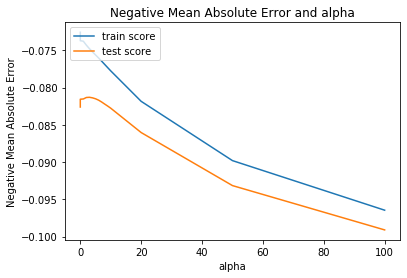

In [68]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [69]:
model_cv.best_estimator_

Ridge(alpha=3.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

#### The best alpha for Ridge is 3. Let's investigate further

In [70]:
alpha = 3
ridge = Ridge(alpha=alpha)

ridge.fit(X_train_ridge, y_train)
ridge.coef_

array([-0.0395805 ,  0.06932484,  0.14375925,  0.03468832,  0.03420748,
        0.06893717,  0.04265232, -0.06647832, -0.09284767,  0.13689423,
        0.04021989,  0.08411418,  0.02622425,  0.08756166,  0.13262159,
       -0.1263891 ,  0.03935415,  0.04635699,  0.05793213,  0.12186754,
       -0.03557114,  0.06682065,  0.03641411, -0.12870309, -0.08750772,
        0.04058789,  0.09065323,  0.16460106,  0.12493893, -0.08376707,
       -0.148556  , -0.05159817,  0.06723314,  0.12284604,  0.13585645,
        0.15728003,  0.04052524,  0.0310967 , -0.12928111,  0.09145518,
       -0.01816621, -0.06090497,  0.03364071,  0.03132486,  0.01868031,
        0.01987699,  0.06227725, -0.1182869 , -0.03599193, -0.06549922,
        0.05651168,  0.06305258, -0.03528796, -0.02358683,  0.06324579,
        0.01877483,  0.01892001,  0.07782791, -0.05524805, -0.04316676,
       -0.09411407, -0.04430196, -0.05877781, -0.08254216,  0.02365936,
       -0.04789096,  0.06460208,  0.04772424,  0.04141157, -0.10

In [71]:
#Model evaluation
print("Ridge model training score: ", ridge.score(X_train_ridge, y_train))
print("Ridge model test score: ", ridge.score(X_test_ridge, y_test))

Ridge model training score:  0.9207156309177829
Ridge model test score:  0.9013548766287218


### Lasso

In [72]:
selected_cols = rfe.get_support(1) #the most important features
X_train_lasso = X_train[X_train.columns[selected_cols]]
X_test_lasso = X_test[X_test.columns[selected_cols]]
X_train_lasso.shape

(993, 70)

In [73]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_lasso, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.1s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [74]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015781,0.004058,0.002012,0.000075,0.0001,{'alpha': 0.0001},-0.087779,-0.072514,-0.077966,-0.085727,-0.086605,-0.082110,0.005914,1,-0.072932,-0.075046,-0.074474,-0.072909,-0.071540,-0.073380,0.001248
1,0.006938,0.001246,0.001981,0.000590,0.001,{'alpha': 0.001},-0.087734,-0.073649,-0.083256,-0.088165,-0.090673,-0.084686,0.006020,2,-0.080267,-0.081244,-0.081361,-0.078027,-0.077831,-0.079746,0.001533
2,0.003532,0.000087,0.001324,0.000144,0.01,{'alpha': 0.01},-0.108895,-0.105494,-0.112694,-0.120890,-0.120958,-0.113772,0.006255,3,-0.111900,-0.113898,-0.112834,-0.110569,-0.110800,-0.112000,0.001249
3,0.004308,0.000862,0.001884,0.000665,0.05,{'alpha': 0.05},-0.129135,-0.127273,-0.124746,-0.137863,-0.133856,-0.130564,0.004706,4,-0.132367,-0.130938,-0.131935,-0.126884,-0.127261,-0.129877,0.002339
4,0.006019,0.001351,0.002233,0.000952,0.1,{'alpha': 0.1},-0.167684,-0.157840,-0.151844,-0.158807,-0.159704,-0.159176,0.005071,5,-0.162092,-0.159310,-0.160002,-0.155980,-0.154392,-0.158355,0.002790


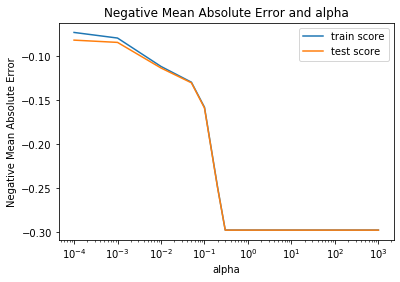

In [75]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [76]:
model_cv.best_estimator_

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

#### The best alpha for Lasso is 0.0001 which was the second parameter. Let's investigate further

In [77]:
alpha = 0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lasso, y_train) 

lasso.coef_

array([-3.80051668e-02,  6.61675482e-02,  1.43316085e-01,  3.42988423e-02,
        3.32542534e-02,  6.51207154e-02,  0.00000000e+00, -7.38916771e-02,
       -1.00792788e-01,  1.89699763e-01,  8.04840528e-02,  1.26654859e-01,
        7.14429812e-02,  9.54178925e-02,  1.44928670e-01, -1.63463250e-01,
        1.11370463e-02,  4.35907912e-02,  6.45755227e-02,  1.42368994e-01,
       -1.38661070e-02,  1.10200658e-01,  4.04003197e-02, -3.03232279e-01,
       -9.30041046e-02,  4.53064635e-02,  1.02276880e-01,  2.00087809e-01,
        1.96734802e-01, -1.11146379e-01, -1.21548361e-01, -4.49983068e-02,
        7.20121745e-02,  1.28894319e-01,  1.44898165e-01,  1.80986063e-01,
        3.66210221e-02,  3.30267260e-02, -5.04931562e-01,  9.70307025e-02,
       -0.00000000e+00,  0.00000000e+00,  2.97008474e-02,  3.49905205e-02,
        5.85817916e-03,  2.26377262e-02,  6.52421591e-02, -1.14126972e-01,
       -3.02791723e-02, -5.68253512e-02,  5.39450799e-02,  6.22536418e-02,
       -3.86027308e-02, -

In [78]:
#Model evaluation
print("Lasso model training score: ", lasso.score(X_train_lasso, y_train))
print("Lasso model test score: ", lasso.score(X_test_lasso, y_test))

Lasso model training score:  0.9237592689257371
Lasso model test score:  0.8984797876885108


## Model Results

## Ridge

### Training score - 92.13%
### Test score - 90.13%

## Lasso

### Training score - 92.03%
### Test score - 89.94%

### Model Coefficients

#### Ridge

In [79]:
ridge_coef = pd.DataFrame(ridge.coef_, index=X_train_ridge.columns,
                       columns=['Coefficients'])
ridge_coef['Absolute Coefficient'] = abs(ridge_coef['Coefficients'])
ridge_coef.sort_values(by = 'Absolute Coefficient', ascending = False).head(10)

,Coefficients,Absolute Coefficient
OverallQual_Excellent,0.164601,0.164601
OverallCond_Excellent,0.157280,0.157280
OverallCond_Fair,-0.148556,0.148556
GrLivArea,0.143759,0.143759
MSZoning_FV,0.136894,0.136894
OverallCond_Very_Good,0.135856,0.135856
Neighborhood_Crawfor,0.132622,0.132622
Exterior1st_BrkComm,-0.129281,0.129281
OverallQual_Poor,-0.128703,0.128703
Neighborhood_MeadowV,-0.126389,0.126389


#### Lasso

In [80]:
lasso_coef = pd.DataFrame(lasso.coef_, index=X_train_lasso.columns,
                       columns=['Coefficients'])
lasso_coef['Absolute Coefficient'] = abs(lasso_coef['Coefficients'])
lasso_coef.sort_values(by = 'Absolute Coefficient', ascending = False).head(10)

,Coefficients,Absolute Coefficient
Exterior1st_BrkComm,-0.504932,0.504932
OverallQual_Poor,-0.303232,0.303232
OverallQual_Excellent,0.200088,0.200088
OverallQual_Very_Excellent,0.196735,0.196735
MSZoning_FV,0.189700,0.189700
OverallCond_Excellent,0.180986,0.180986
BsmtFullBath_3,0.166741,0.166741
Neighborhood_MeadowV,-0.163463,0.163463
Neighborhood_Crawfor,0.144929,0.144929
OverallCond_Very_Good,0.144898,0.144898


----------------------------------------------------------------------------------------------------------------------

----------------------------------------------------------------------------------------------------------------------

#### Subjective question 1:
What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [81]:
alpha_ridge = 2.5 * 2

ridge = Ridge(alpha = alpha_ridge)

ridge.fit(X_train_ridge, y_train)
ridge

Ridge(alpha=5.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [82]:
#Model evaluation
print("Ridge model training score: ", ridge.score(X_train_ridge, y_train))
print("Ridge model test score: ", ridge.score(X_test_ridge, y_test))

Ridge model training score:  0.9185096990108471
Ridge model test score:  0.9007872607280462


In [83]:
ridge_coef = pd.DataFrame(ridge.coef_, index=X_train_ridge.columns,
                       columns=['Coefficients'])
ridge_coef['Absolute Coefficient'] = abs(ridge_coef['Coefficients'])
ridge_coef.sort_values(by = 'Absolute Coefficient', ascending = False).head(10)

,Coefficients,Absolute Coefficient
OverallQual_Excellent,0.150875,0.150875
OverallCond_Fair,-0.144736,0.144736
GrLivArea,0.144237,0.144237
OverallCond_Excellent,0.142892,0.142892
OverallCond_Very_Good,0.129968,0.129968
Neighborhood_Crawfor,0.124816,0.124816
OverallCond_Good,0.119162,0.119162
MSZoning_FV,0.114909,0.114909
Neighborhood_MeadowV,-0.108940,0.108940
ExterQual_Fa,-0.108780,0.108780


In [84]:
alpha_lasso = 0.0003 * 2
lasso = Lasso(alpha = alpha_lasso)

lasso.fit(X_train_lasso, y_train)
lasso

Lasso(alpha=0.0006, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [85]:
#Model evaluation
print("Lasso model training score: ", lasso.score(X_train_lasso, y_train))
print("Lasso model test score: ", lasso.score(X_test_lasso, y_test))

Lasso model training score:  0.9139736492319578
Lasso model test score:  0.9016816533562949


In [86]:
lasso_coef = pd.DataFrame(lasso.coef_, index=X_train_lasso.columns,
                       columns=['Coefficients'])
lasso_coef['Absolute Coefficient'] = abs(lasso_coef['Coefficients'])
lasso_coef.sort_values(by = 'Absolute Coefficient', ascending = False).head(10)

,Coefficients,Absolute Coefficient
OverallQual_Excellent,0.186742,0.186742
OverallCond_Fair,-0.180933,0.180933
OverallCond_Excellent,0.162595,0.162595
GrLivArea,0.144767,0.144767
OverallQual_Very_Excellent,0.144589,0.144589
OverallCond_Very_Good,0.137467,0.137467
Neighborhood_Crawfor,0.128632,0.128632
OverallCond_Good,0.123308,0.123308
House_Age,-0.109044,0.109044
Neighborhood_MeadowV,-0.107762,0.107762


----------------------------------------------------------------------------------------------------------------------

#### Subjective question 2:
You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

##### Calculating the number of significant features in a model

In [87]:
ridge_coef[ridge_coef['Absolute Coefficient'] > 0]['Coefficients'].count()

70

In [88]:
lasso_coef[lasso_coef['Absolute Coefficient'] != 0]['Coefficients'].count()

50

From the above 2 calculations, it is clear that lasso has less number of predictors in the model, hence, it is simpler as compared to the ridge model. Now, since, both of the models have comparable scores on both, test and train, we conclude that lasso model is better because it uses less predictors to achieve that score.

----------------------------------------------------------------------------------------------------------------------

#### Subject question 3:
After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

top 5 predictors in lasso model: 
- Exterior1st_BrkComm
- OverallQual_Poor
- OverallCond_Excellent
- OverallQual_Very_Excellent
- OverallQual_Excellent

In [89]:
# Removing these columns from training and test set and modelling again
X_train_lasso.drop(['Exterior1st_BrkComm', 'OverallQual_Poor', 'OverallCond_Excellent', 'OverallQual_Excellent',
                   'OverallQual_Very_Excellent'], axis = 1, inplace = True)
X_test_lasso.drop(['Exterior1st_BrkComm', 'OverallQual_Poor', 'OverallCond_Excellent', 'OverallQual_Excellent',
                   'OverallQual_Very_Excellent'], axis = 1, inplace = True)

In [90]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_lasso, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [91]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022766,0.003672,0.002388,0.000176,0.0001,{'alpha': 0.0001},-0.090403,-0.077375,-0.083994,-0.089931,-0.090075,-0.086348,0.005086,1,-0.078091,-0.079064,-0.079025,-0.076493,-0.076334,-0.077801,0.001187
1,0.021333,0.018814,0.002300,0.000282,0.001,{'alpha': 0.001},-0.092135,-0.077810,-0.087649,-0.091948,-0.094520,-0.088803,0.005933,2,-0.084265,-0.084097,-0.084273,-0.081236,-0.081633,-0.083101,0.001368
2,0.006476,0.001495,0.002375,0.000382,0.01,{'alpha': 0.01},-0.108895,-0.105494,-0.112694,-0.120890,-0.120958,-0.113772,0.006255,3,-0.111900,-0.113898,-0.112834,-0.110569,-0.110800,-0.112000,0.001249
3,0.005930,0.000222,0.002221,0.000307,0.05,{'alpha': 0.05},-0.129135,-0.127273,-0.124746,-0.137863,-0.133856,-0.130564,0.004706,4,-0.132367,-0.130938,-0.131935,-0.126884,-0.127261,-0.129877,0.002339
4,0.004379,0.000450,0.001931,0.000337,0.1,{'alpha': 0.1},-0.167684,-0.157840,-0.151844,-0.158807,-0.159704,-0.159176,0.005071,5,-0.162092,-0.159310,-0.160002,-0.155980,-0.154392,-0.158355,0.002790


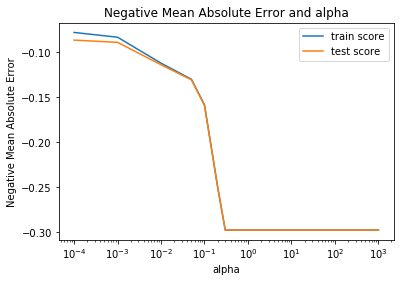

In [92]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [93]:
model_cv.best_estimator_

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

#### The best alpha for Lasso is 0.0001 which was the second parameter. Let's investigate further

In [94]:
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001 ]}
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train_lasso, y_train) 

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [95]:
model_cv.best_estimator_

Lasso(alpha=0.0003, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

#### The best value of alpha seems to be 0.0003

In [96]:
alpha = 0.0003

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train_lasso, y_train) 

lasso.coef_

array([-0.0399745 ,  0.07191474,  0.14610748,  0.03684464,  0.        ,
        0.07996757,  0.        , -0.07207461, -0.099006  ,  0.11562312,
        0.        ,  0.05613538,  0.        ,  0.08489957,  0.14144741,
       -0.12076489,  0.        ,  0.05573596,  0.05739938,  0.15155751,
       -0.        ,  0.10948446,  0.02420144, -0.08541502,  0.01941458,
        0.04442524, -0.07427654, -0.19745534, -0.06036022,  0.05567369,
        0.10901167,  0.12081121,  0.04644003,  0.        ,  0.08403231,
       -0.        , -0.02344733,  0.        ,  0.01014065,  0.        ,
       -0.        ,  0.04517749, -0.22805097, -0.09510918, -0.14162035,
        0.05212059,  0.06613158, -0.02513441, -0.        ,  0.        ,
        0.00207642, -0.        ,  0.0840921 , -0.06444917, -0.03541038,
       -0.13458835, -0.06482176, -0.0878468 , -0.05884713,  0.        ,
       -0.05083709,  0.04886998,  0.02388276,  0.02700624, -0.10569272])

In [97]:
#Model evaluation
print("Lasso model training score: ", lasso.score(X_train_lasso, y_train))
print("Lasso model test score: ", lasso.score(X_test_lasso, y_test))

Lasso model training score:  0.9111998873295549
Lasso model test score:  0.8971803793518712


In [98]:
lasso_coef = pd.DataFrame(lasso.coef_, index=X_train_lasso.columns,
                       columns=['Coefficients'])
lasso_coef['Absolute Coefficient'] = abs(lasso_coef['Coefficients'])
lasso_coef.sort_values(by = 'Absolute Coefficient', ascending = False).head(10)

,Coefficients,Absolute Coefficient
ExterQual_Fa,-0.228051,0.228051
OverallCond_Fair,-0.197455,0.197455
Neighborhood_StoneBr,0.151558,0.151558
GrLivArea,0.146107,0.146107
ExterQual_TA,-0.141620,0.141620
Neighborhood_Crawfor,0.141447,0.141447
KitchenQual_Fa,-0.134588,0.134588
OverallCond_Very_Good,0.120811,0.120811
Neighborhood_MeadowV,-0.120765,0.120765
MSZoning_FV,0.115623,0.115623


There is no significant change in the model performance, the model still behaves good on both, train set and test set

Top 5 predictors now are:
- ExterQual_Fa
- OverallCond_Fair
- Neighborhood_StoneBr
- GrLivArea
- ExterQual_TA

# Thank you!!